# anno_mask vis

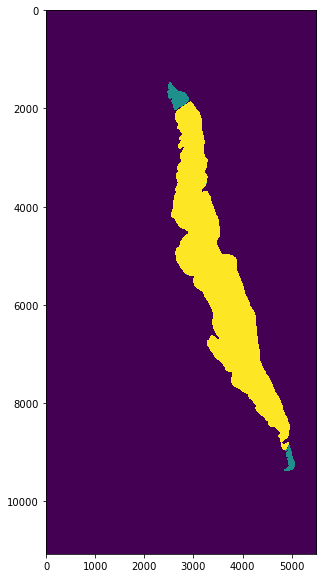

In [8]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

root = '/media/ldy/7E1CA94545711AE6/OSCC/mask_5x/anno_mask/'
ex = '_20190403080921.png'

img_path = root + ex

img = np.array(Image.open(img_path), dtype='uint8')
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

# std_mask vis

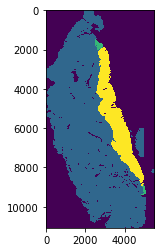

In [9]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

root = '/media/ldy/7E1CA94545711AE6/OSCC/mask_5x/std_mask/'
ex = '_20190403080921.png'

img_path = root + ex

img = np.array(Image.open(img_path), dtype='uint8')
plt.imshow(img)
plt.show()

# std_mask_rgb gen



In [34]:
def class_to_RGB(label):
    h, w = label.shape[0], label.shape[1]
    colmap = np.zeros(shape=(h, w, 3)).astype('uint8')

    indices = np.where(label == 1)
    colmap[indices[0].tolist(), indices[1].tolist(), :] = [255, 0, 0]
    indices = np.where(label == 2)
    colmap[indices[0].tolist(), indices[1].tolist(), :] = [0, 255, 0]
    indices = np.where(label == 3)
    colmap[indices[0].tolist(), indices[1].tolist(), :] = [0, 0, 255]
    indices = np.where(label == 0)
    colmap[indices[0].tolist(), indices[1].tolist(), :] = [0, 0, 0]

    return colmap

In [11]:
import os

src = '/media/ldy/7E1CA94545711AE6/OSCC/mask_5x/std_mask/'
save_dir = '/media/ldy/7E1CA94545711AE6/OSCC/mask_5x/std_mask_rgb'

if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
img_list = os.listdir(src)
for img in img_list:
    print(img)
    mask_path = os.path.join(src, img)
    save_path = os.path.join(save_dir, img)
    
    mask = np.array(Image.open(mask_path), dtype='uint8')
    rgb = class_to_RGB(mask)
    rgb = Image.fromarray(rgb)
    rgb.save(save_path)

_20190403101027.png
_20190404140854.png
_20190412130816.png
_20190718210408.png
_20190403080921.png
_20190403080932.png
_20190403080952.png
_20190403081003.png
_20190403081013.png
_20190403083910.png
_20190403083921.png
_20190403083941.png
_20190403091239.png
_20190403091249.png
_20190403091259.png
_20190403091310.png
_20190403091320.png
_20190403094116.png
_20190403094156.png
_20190403094206.png
_20190403101908.png
_20190403101928.png
_20190403101939.png
_20190403101949.png
_20190403101959.png
_20190403115136.png
_20190403115146.png
_20190403115157.png
_20190403115208.png
_20190404134831.png
_20190404134841.png
_20190404134923.png
_20190404140803.png
_20190404140813.png
_20190404140823.png
_20190404140844.png
_20190404173751.png
_20190409135946.png
_20190409141622.png
_20190409144119.png
_20190409144129.png
_20190409152251.png
_20190409182931.png
_20190409183934.png
_20190412091216.png
_20190412091226.png
_20190412091236.png
_20190412112805.png
_20190412112816.png
_20190412112827.png


# patch mask generate

## mask

In [62]:
import numpy as np
import os


def mask_generate(slide, size, meta, data_dir):
    mask = np.zeros(size, dtype='uint8')
    slide_dir = os.path.join(data_dir, slide)
    
    for patch in os.listdir(slide_dir):
        sp = patch
        index = meta[meta['image_id']==sp].index
        row = int(meta['row'][index])
        col = int(meta['col'][index])
        target = int(meta['target'][index])
        
#         target = 1 if target == 1 else 2
        mask[row, col] = target
    
    return mask

In [73]:
import json
from PIL import Image
import pandas as pd

task = 'val_bd_512'

meta_path = '/media/ldy/e5a10f4e-18fd-4656-80d8-055bc4078655/OSCC-Tile/5x_512/tile_info_' + 'val_512' + '.json'
csv_path = '/media/ldy/e5a10f4e-18fd-4656-80d8-055bc4078655/OSCC-Tile/5x_512/' + task + '.csv'
data_dir = '/media/ldy/e5a10f4e-18fd-4656-80d8-055bc4078655/OSCC-Tile/5x_512/' + task 
mask_dir = '/media/ldy/e5a10f4e-18fd-4656-80d8-055bc4078655/OSCC-Tile/slide/mask/' + task  + '_mask_5x'
vis_dir = '/media/ldy/e5a10f4e-18fd-4656-80d8-055bc4078655/OSCC-Tile/slide/vis/' + task + '_vis_5x'

if not os.path.exists(mask_dir):
    os.makedirs(mask_dir)
if not os.path.exists(vis_dir):
    os.makedirs(vis_dir)

with open(meta_path, 'r') as f:
    cnt = json.load(f)

meta = pd.read_csv(csv_path)

for slide in os.listdir(data_dir):
    print(slide)
    size = cnt[slide]['tiles']
    mask = mask_generate(slide, size, meta, data_dir)
    vis = class_to_RGB(mask)
    
    mask_pil = Image.fromarray(mask)
    vis_pil = Image.fromarray(vis).convert('RGB')
    
    mask_pil.save(os.path.join(mask_dir, slide+'.png'))
    vis_pil.save(os.path.join(vis_dir, slide+'.png'))

_20190404173751
_20190719181439
_20190412091226
_20190404140844
_20190403094206
_20190403101928
_20190718213917
_20190409144119
_20190403083910
_20190409135946
_20190412130836
_20190409183934
_20190412091216
_20190719183613
_20190718213907
_20190403115136
_20190718213936
_20190403094116
_20190719181431
_20190718212036
_20190718200921
_20190719181501
_20190412130806
_20190404134841
_20190718203748
_20190718200940
_20190412144040


## resize

In [74]:
src = '/media/ldy/e5a10f4e-18fd-4656-80d8-055bc4078655/OSCC-Tile/slide/vis/'
dst = '/media/ldy/e5a10f4e-18fd-4656-80d8-055bc4078655/OSCC-Tile/slide/vis_x16/'
factor = 16

for item in os.listdir(src):
    src_item_dir = os.path.join(src, item)
    dst_item_dir = os.path.join(dst, item)
    if not os.path.exists(dst_item_dir):
        os.makedirs(dst_item_dir)
    print(item)
    for c in os.listdir(src_item_dir):
        img = Image.open(os.path.join(src_item_dir, c))
        w, h = img.size
        img = img.resize((w*factor, h*factor), resample=Image.BILINEAR)
        img.save(os.path.join(dst_item_dir, c))

train_512_vis_5x
train_224_vis_5x
train_bd_512_vis_5x
val_512_vis_5x
val_224_vis_5x
val_bd_512_vis_5x
train_bd_224_vis_5x
val_bd_224_vis_5x
